In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [22]:
Gold_dataset = pd.read_csv(r"G:\Machine Learning\Gold_Price_Prediction\gld_price_data.csv")

In [23]:
Gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
Gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [25]:
Gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
Gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
Gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation:

1. Positive Correlation
2. Negative Correlation

In [28]:
# Assuming 'Date' is the name of your date column
Gold_dataset['Date'] = pd.to_datetime(Gold_dataset['Date'], errors='coerce')


In [29]:
correlation = Gold_dataset.corr()

In [ ]:
correlation

Constructing a Heatmap to Understand the correlation

<Axes: >

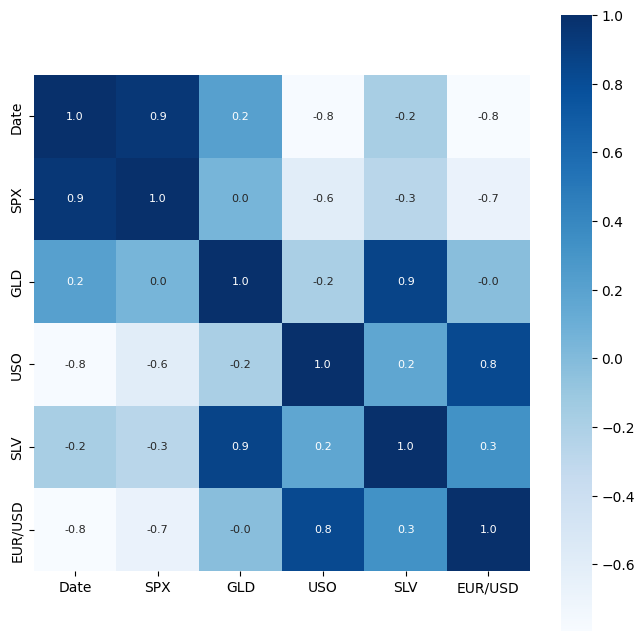

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [31]:
#Correlation Values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


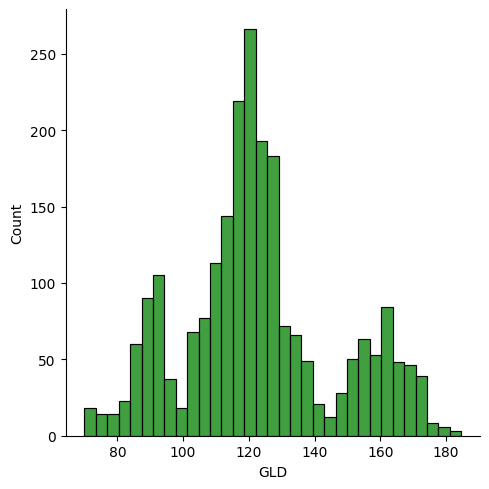

In [32]:
#Checking the distribution of the GLD Price
sns.displot(Gold_dataset['GLD'],color='green')

Splitting the Features and Target

In [33]:
x = Gold_dataset.drop(['Date','GLD'],axis=1)
y = Gold_dataset['GLD']

In [34]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

Model Training: Random Forest Regressor

In [37]:
regressor = RandomForestRegressor(n_estimators=100)

In [38]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

Prediction on Test Data

In [39]:
test_data_prediction = regressor.predict(x_test)

In [40]:
print(test_data_prediction)

[164.35790001 127.48609901 124.30779968 119.63579901 125.99119881
  86.58749806 171.73040129 134.98129929 106.95750046 132.93480181
 120.74749936 124.89350033 143.23099864 104.46209975  80.90199899
 119.20220025 140.33929984  90.26640083  91.32839945 128.47330257
 125.72569937 147.99719983 116.47330157 153.0944992  129.40809923
 129.65950118 118.17160096 111.40270039 168.20400144 158.16099773
 126.00270133 154.35930137 127.02949947 122.63769778 116.11590138
 154.69160005 114.97479996 120.46790144 103.73860199 105.4973003
 135.56409928  85.75389943 156.58490223 121.30680012 122.32370065
 155.73110074 120.36090031 116.56600005 168.13700308 116.4347009
 138.16130223 161.56999838 157.94130009 153.00430117 124.14440016
 116.96200052 167.06070044 117.28659972 165.73510006  84.06900007
 121.38639912 122.10570015 119.90830059 171.97939817 119.17299927
 180.66849679 162.06440266 138.06900239 115.61699988  92.66720047
 171.91569982 117.57159936 117.68459844 125.57720006 147.04269929
  91.4370011

In [41]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.9845904910716292


Compare Actual Value and Predicted Value

In [42]:
y_test = list(y_test)

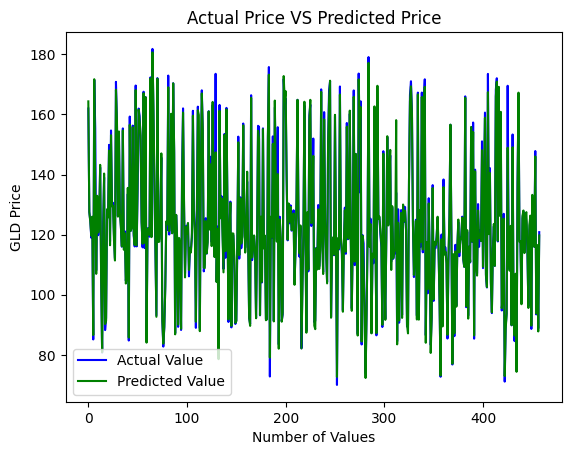

In [43]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()